In [1]:
using Distributions, StatPlots, LaTeXStrings

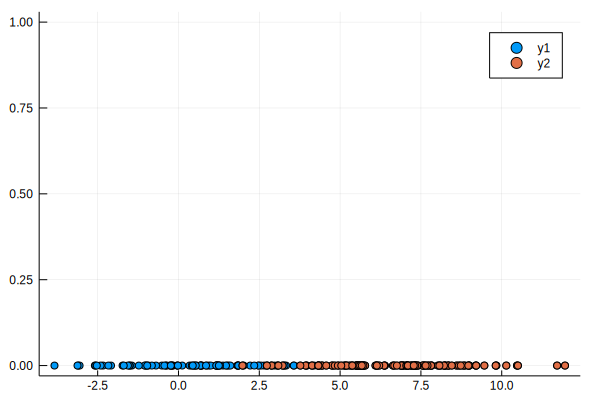

In [2]:
# INTRODUCTION 
# Consider this problem, suppose that you were given a set a points, and you knew they
# belonged to two different gaussian distributions. Gaussian A, and Gaussian B. 
# knowing this, you could estimate their mean, and variance of each distribution? 

# ie. 

points = [rand(Normal(1,2),100),rand(Normal(7,2),100)] 
allPoints = append!(points[1],points[2])
# pretend you dont know the paramters 1,2 and 3,2 for the two gaussian distributions. 
# so we have a total of 200 points, with the first 100 belonged to gaussian distribution A,
# and the second 100 or so belonged to distribution B. 

# so knowing this lets plot the points on a grid, 
scatter(points[1],zeros(length(points[1])))
scatter!(points[2],zeros(length(points[2])))

0.7898568901899136
2.1007495333712303
6.795236165467802
1.9508250088259065


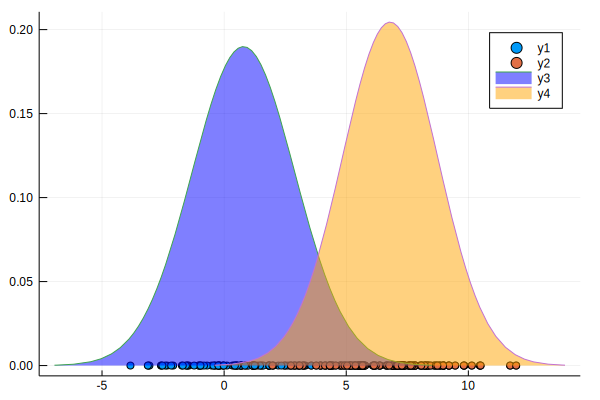

In [3]:
# Right so now that we know which group each set of points belongs to we can estimate 
# the parameters of the gaussian distribution. 

mA = mean(allPoints[1:100])
println(mA)
sA = sqrt(var(allPoints[1:100]))
println(sA)
mB = mean(points[2])
sB = sqrt(var(points[2]))
println(mB)
println(sB)
# and then we could overlay the distributions with their estimates. 

plot!(Normal(mA,sA), fill=(0, .5,:blue))
plot!(Normal(mB,sB), fill =(0,.5,:orange))

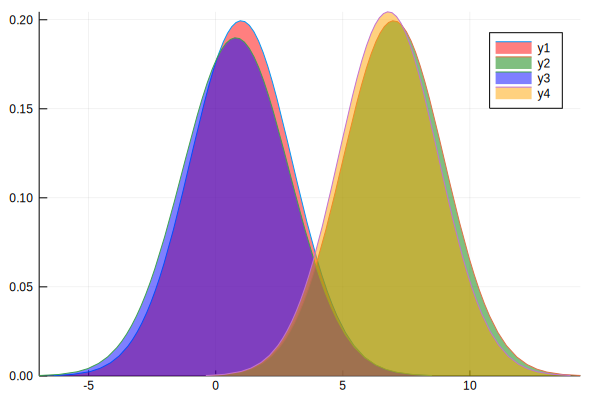

In [4]:
# lets compare our estimate distributions, to the true distributions. 

plot(Normal(1,2),fill=(0, .5,:red)) # y1
plot!(Normal(7,2),fill=(0, .5,:green)) # y2

plot!(Normal(mA,sA), fill=(0, .5,:blue)) # y3
plot!(Normal(mB,sB), fill =(0,.5,:orange)) # y4 


In [5]:
# Our estimates appear to be very good. 

# now lets consider the case where we don't know what group each point belongs too, 
# however we know the shape of the two gaussians. 

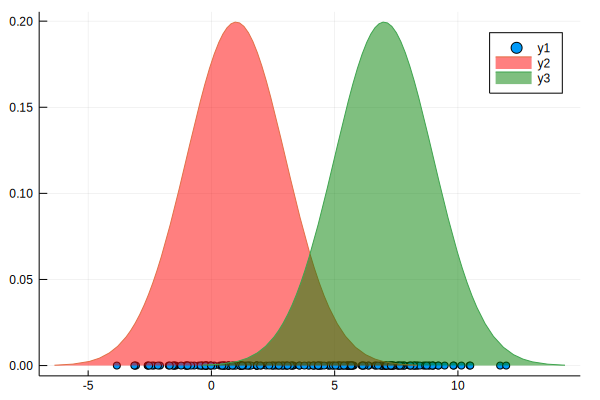

In [6]:
scatter(allPoints,zeros(200))
plot!(Normal(1,2),fill=(0, .5,:red)) # y1
plot!(Normal(7,2),fill=(0, .5,:green)) # y2

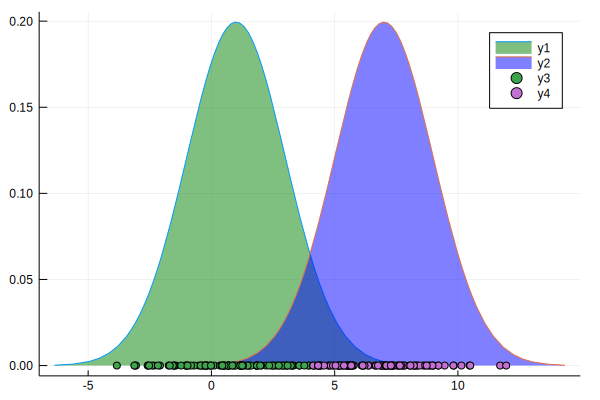

In [7]:
# Then we can calculate the probability of each point belonging to distribution A or B, 
# based on a posterior. 
A = Normal(1,2)
B = Normal(7,2)
pxA = map(x -> pdf(A,x),allPoints)
pxB = map(x -> pdf(B,x),allPoints)

pA = pxA./(pxA + pxB)
pB = 1- pA


function mark(x,y)
    if x > y
        return 0
        else
        return 1
    end
end

function assign(x,label)
    if label == 0
        return x
        else 
        return 
    end
end

marks = map((x,y) -> mark(x,y), pA,pB)

estPointsA = allPoints[marks .== 0]
estPointsB = allPoints[marks .== 1]

plot(A,fill=(0, .5,:green))
plot!(B,fill=(0, .5,:blue))
scatter!(estPointsA, zeros(length(estPointsA)))
scatter!(estPointsB, zeros(length(estPointsB)))

# Not bad, we have calssified them but there are a few mislabeled ones. 

In [8]:
# Suppose we dont know the shape of the distributions, or the labels of the points, 
# then the EM algorithm will be perfect for this case. 

In [167]:
# Guess what the iniital paramters are. 

# true distributions. 
Atrue = Normal(1,2)
Btrue = Normal(7,2)


# initialize Guesses. 
iAMu = 3 
iBMu = 4
iASig = 0.7
iBSig = 4
piA = 0.7
piB = 1 - piA 

Astart = Normal(iAMu,iASig)
Bstart = Normal(iBMu,iBSig);



In [168]:
A = Astart
B = Bstart

Distributions.Normal{Float64}(μ=4.0, σ=4.0)

In [169]:
pxA = map(x -> pdf(A,x),allPoints)
pxB = map(x -> pdf(B,x),allPoints)

llold = -log(prod(piA.*pxA + piB.*pxB))
diff = 5

# Stop if the difference between the old and new logliklihoods are too far apart. 
while diff > 0.0001

    pxA = map(x -> pdf(A,x),allPoints)
    pxB = map(x -> pdf(B,x),allPoints)

    # E-step 
    ziA = (piA*pxA)./(piA*pxA + piB*pxB)
    ziB = 1 - ziA

    # M -Step 
    piA = mean(ziA)
    piB = 1 - piA

    muA = sum(allPoints.*ziA)./sum(ziA)
    muB = sum(allPoints.*ziB)./sum(ziB)

    sigA = sqrt(sum(((allPoints - muA).^2).*ziA)./sum(ziA))
    sigB = sqrt(sum(((allPoints - muB).^2).*ziB)./sum(ziB))

    llnew = -log(prod(piA.*pxA + piB.*pxB))
    diff = abs(llnew - llold)
    
    A = Normal(muA,sigA)
    B = Normal(muB,sigB)
    
    llold = llnew
end

#plot!(Atrue,fill=(0, .5,:green))
#plot!(Btrue,fill=(0, .5,:blue))


565.6502483599786124.3070492536516551.107366608004414.542881751974164545.80100598968995.306360618314557543.3960417115012.4049642781889133541.9440034257571.4520382857439245540.9236446867171.0203587390400344540.09996581301610.823678873700942539.26231624621830.8376495667977224538.26243871311890.9998775330994931537.1515598626651.1108788504539007536.13678785324041.0147720094245187535.33917342805430.7976144251861115534.72856208855680.6106113394974955534.23313420020430.4954278883525376533.80371047552270.42942372468155554533.41583560076950.38787487475326543533.05696963265750.35886596811201343532.71888981720290.3380798154545346532.39561993895440.3232698782485386532.08311201182860.3125079271258073531.77890393191130.30420807991731635531.48165265754270.2972512743685911531.19075743136950.29089522617312014530.9061339110150.2846235203545575530.62809429532830.27803961568668530.35727570699260.2708185883357146530.09457890778640.2626967992061964529.84109914471140.2534797630750063529.5980439157720.2430552

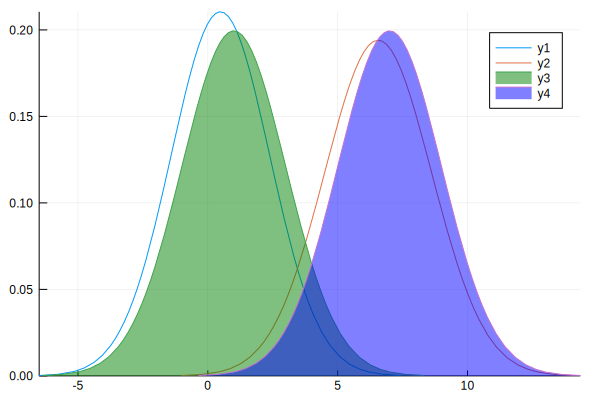

In [172]:
plot(A)
plot!(B)
plot!(Atrue,fill=(0, .5,:green))
plot!(Btrue,fill=(0, .5,:blue))

In [ ]:
# estimation is pretty decent, with more data the curves should get closer to the true values. 